# Patterns Recognition Assignment3: Spam Filter

### import important Packages

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


random.seed(244)

### Load Data Set

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/spambase/spambase.data', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Data Preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [4]:
X = dataset.drop(columns=57, axis=0)
y = dataset[57]

In [5]:
labels = y.unique()
labels

array([1, 0])

In [6]:
labels_values_count = y.value_counts()
labels_values_count

0    2788
1    1813
Name: 57, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


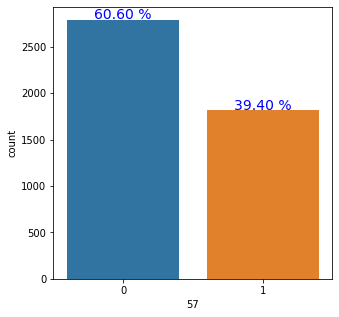

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(y)
for label in labels:
  percentage = f'{100 * labels_values_count[label] / len(y):.2f} %'
  plt.text(label, labels_values_count[label]+10, str(percentage), ha='center', color='blue', fontsize=14)
plt.show()

In [8]:
label1 = X[y==1]
label1

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,0.00,0.00,0.00,0.0,0.00,0.23,0.00,0.00,0.00,0.00,...,0.0,0.077,0.038,0.000,0.000,0.000,0.038,2.600,42,182
1809,0.39,0.00,0.00,0.0,0.00,0.39,0.79,0.00,0.00,0.39,...,0.0,0.000,0.064,0.000,0.640,0.192,0.000,2.740,13,74
1810,0.00,0.00,0.77,0.0,0.38,0.38,0.38,0.00,0.00,0.77,...,0.0,0.063,0.127,0.255,0.510,0.000,0.000,3.685,62,258
1811,0.00,0.00,0.00,0.0,0.53,0.00,0.53,0.00,0.53,0.00,...,0.0,0.000,0.000,0.000,0.082,0.000,0.000,4.391,66,101


In [9]:
y_label = y[y==1].iloc[0]
y_label

1

In [10]:
count = len(X)
for i in range(labels_values_count[0] - labels_values_count[1]):
  random_row = label1.iloc[random.randint(0, len(label1)-1),:]
  X.loc[count+i] = random_row
  y.loc[count+i] = y_label

In [11]:
len(y)

5576

In [12]:
labels = y.unique()
labels

array([1, 0])

In [13]:
labels_values_count = y.value_counts()
labels_values_count

1    2788
0    2788
Name: 57, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


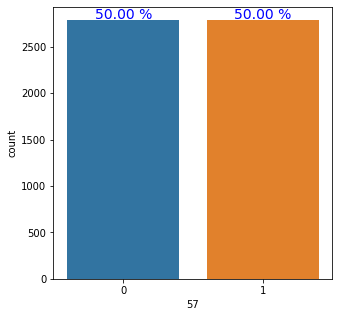

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(y)
for label in labels:
  percentage = f'{100 * labels_values_count[label] / len(y):.2f} %'
  plt.text(label, labels_values_count[label]+10, str(percentage), ha='center', color='blue', fontsize=14)
plt.show()

In [15]:
stander = StandardScaler()
X_standard = stander.fit_transform(X)

In [16]:
X_standard.shape

(5576, 57)

### Split Data To Train and Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, train_size=0.8, random_state=244)

### Build The Model

In [18]:
epochs = 20
batch_size = 32
loss = tf.losses.BinaryCrossentropy()
optimizer = tf.optimizers.Adam(learning_rate=0.005)

In [19]:
model = Sequential()
model.add(Input((57,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 58        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


### Train The Model

In [20]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
126/126 [==============================] - 4s 17ms/step - loss: 0.4566 - accuracy: 0.8054 - val_loss: 0.3376 - val_accuracy: 0.8632
Epoch 2/20
126/126 [==============================] - 1s 5ms/step - loss: 0.2891 - accuracy: 0.9091 - val_loss: 0.2967 - val_accuracy: 0.8901
Epoch 3/20
126/126 [==============================] - 1s 6ms/step - loss: 0.2614 - accuracy: 0.9195 - val_loss: 0.2804 - val_accuracy: 0.8946
Epoch 4/20
126/126 [==============================] - 1s 7ms/step - loss: 0.2479 - accuracy: 0.9208 - val_loss: 0.2680 - val_accuracy: 0.8901
Epoch 5/20
126/126 [==============================] - 1s 6ms/step - loss: 0.2401 - accuracy: 0.9220 - val_loss: 0.2618 - val_accuracy: 0.8946
Epoch 6/20
126/126 [==============================] - 1s 6ms/step - loss: 0.2345 - accuracy: 0.9250 - val_loss: 0.2568 - val_accuracy: 0.8991
Epoch 7/20
126/126 [==============================] - 1s 11ms/step - loss: 0.2305 - accuracy: 0.9238 - val_loss: 0.2543 - val_accuracy: 0.9036
Epoc

### Train Statisics

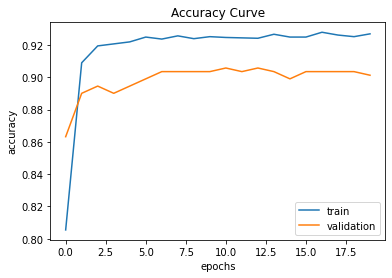

In [21]:
plt.plot(range(epochs), history.history['accuracy'], label='train')
plt.plot(range(epochs), history.history['val_accuracy'], label='validation')
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

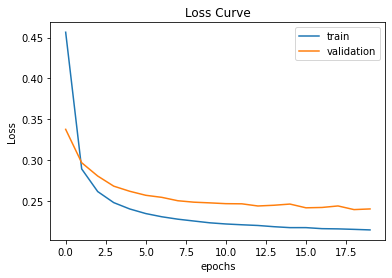

In [22]:
plt.plot(range(epochs), history.history['loss'], label='train')
plt.plot(range(epochs), history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### Test The Model

In [23]:
model.evaluate(X_test, y_test)

35/35 [==============================] - 0s 12ms/step - loss: 0.2144 - accuracy: 0.9409


[0.21444924175739288, 0.9408602118492126]

### Logistic Regression Model

In [24]:
clf = LogisticRegression(penalty=None)
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [25]:
clf.score(X_train, y_train)

0.931390134529148

In [26]:
clf.score(X_test, y_test)

0.9399641577060932